# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("../","datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

# Working

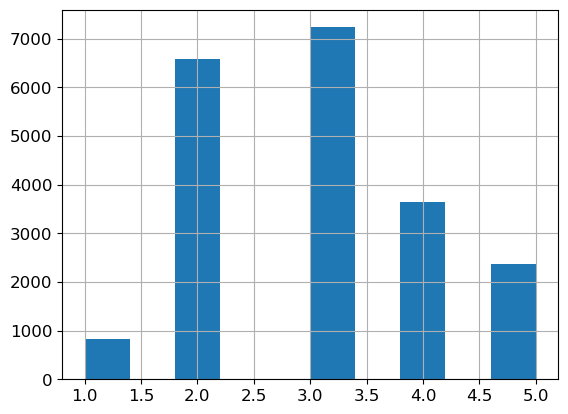

In [5]:
housing['median_income'].describe()
housing['income_cat'] = pd.cut(housing['median_income'],
       bins=[0.,1.5,3.0,4.5, 6, np.inf],
       labels = [1, 2, 3, 4, 5]
       )
housing['income_cat'].hist()
plt.show()

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for test_index, train_index in stratified.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[test_index]
    strat_test_set = housing.loc[train_index]

In [7]:
len(strat_test_set) / len(strat_train_set)

0.25

[0.35053295 0.31879845 0.17635659 0.11434109 0.03997093]


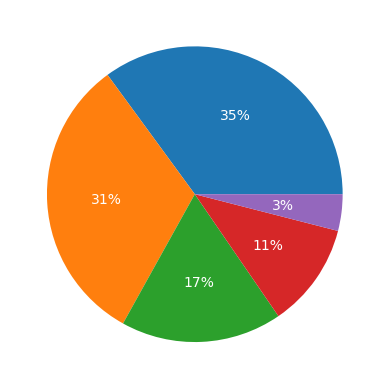

In [8]:
def make_pie(a):
    print(a.values)
    plt.pie(a,labels=a.index, autopct=f"%d%%",textprops={'color':'#fff'})
    plt.show()
make_pie(strat_test_set['income_cat'].value_counts()/len(strat_test_set))

[0.35059351 0.31885901 0.17629603 0.11446221 0.03978924]


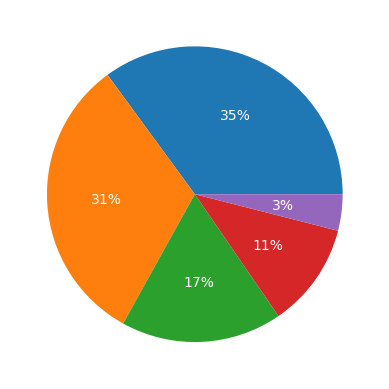

In [9]:
make_pie(strat_train_set['income_cat'].value_counts()/len(strat_train_set))

[0.35059351 0.31885901 0.17629603 0.11446221 0.03978924]


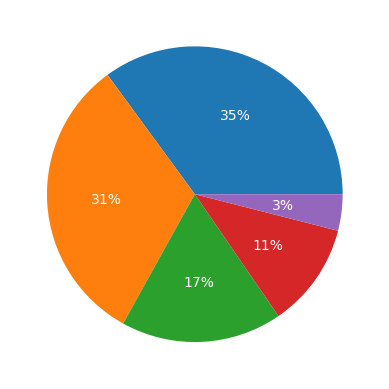

In [10]:
make_pie(strat_train_set['income_cat'].value_counts()/len(strat_train_set))

In [11]:
# Remove income category so that the data is back to its original state

for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Make an exploration set (optional)

count    16512.000000
mean         3.875884
std          1.904931
min          0.499900
25%          2.566950
50%          3.541550
75%          4.745325
max         15.000100
Name: median_income, dtype: float64


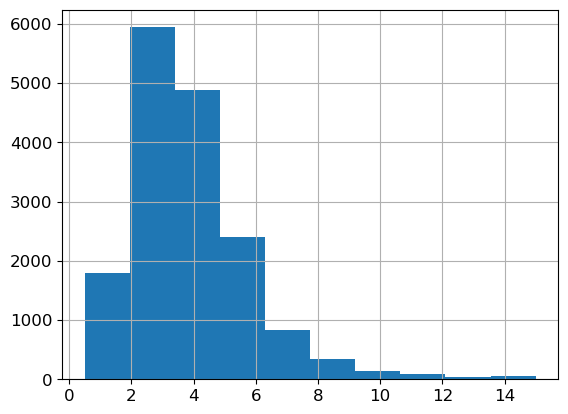

In [12]:
print(strat_train_set['median_income'].describe())
strat_train_set['median_income'].hist()
plt.show()


In [13]:
strat_train_set['income_cat'] =pd.cut(strat_train_set['median_income'], bins=[0,1.5, 3, 4.5 ,6, np.infty],labels=[1,2,3,4,5])
strat_train_set['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
explore_stratified = StratifiedShuffleSplit(n_splits=1,test_size= 0.5, random_state=42)
# print(len(strat_train_set))
for explore_index, train_index in explore_stratified.split(strat_train_set,strat_train_set['income_cat']):
    # print(pd.Series(explore_index).describe())
    # print(pd.Series(train_index).describe())
    strat_explore_set = strat_train_set.iloc[explore_index]
    strat_real_train_set = strat_train_set.iloc[train_index]
    

[0.35053295 0.31891957 0.17635659 0.11446221 0.03972868]


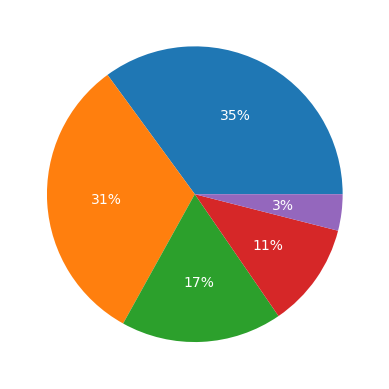

In [15]:
make_pie(strat_explore_set['income_cat'].value_counts()/len(strat_explore_set))

In [16]:
# housing = strat_explore_set # if we wish to continue using the test set
housing = strat_train_set

c:\Users\hursh\.conda\envs\tf2\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


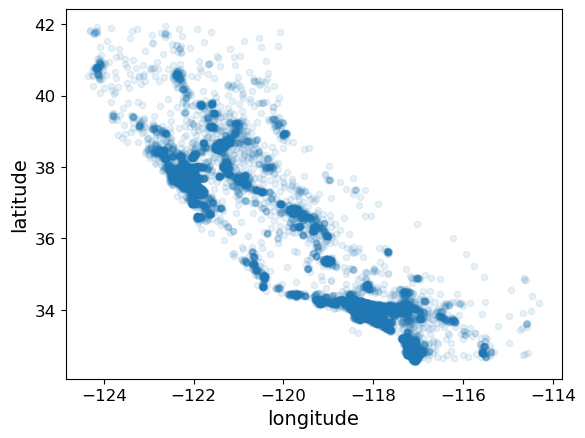

In [17]:
scatter = housing.plot(kind='scatter',x="longitude",y="latitude",alpha=0.1)
plt.show(scatter)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

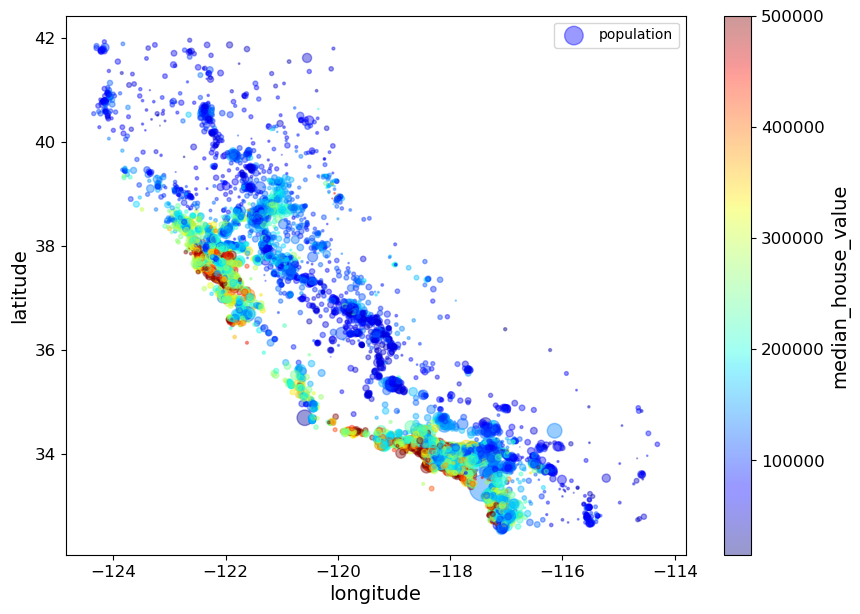

In [18]:
# housing['scaled_population'] = housing['population'].apply(lambda x: x/100)
housing.plot(kind="scatter",x='longitude',y='latitude',alpha=.4,
             figsize= (10,7),
             s=housing['population']/100, label="population",
             c="median_house_value", colorbar=True, cmap=plt.get_cmap('jet'))
# housing.drop('scaled_population',axis=1)
# plt.show()

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

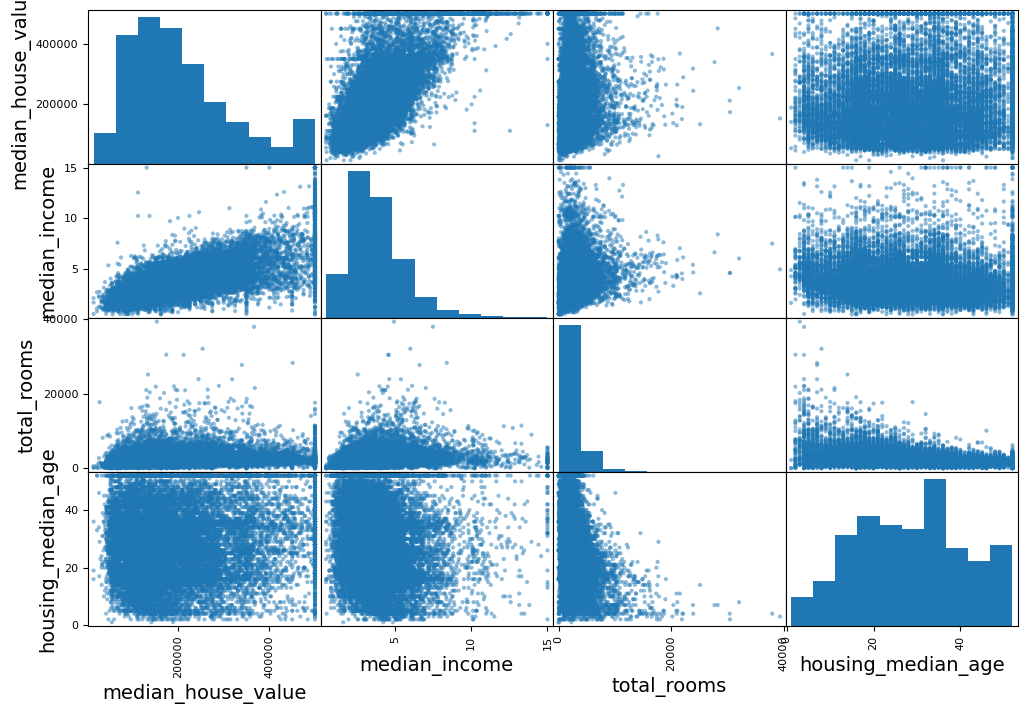

In [20]:
from pandas.plotting import scatter_matrix
# scatter_plot = scatter_matrix(housing) # bad idea
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

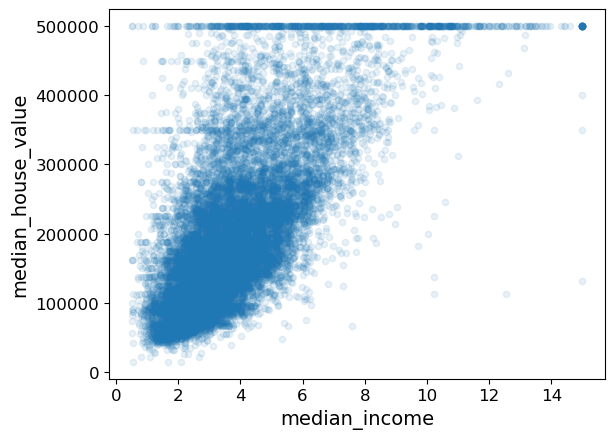

In [21]:
housing.plot(kind="scatter", x="median_income",y="median_house_value",
            alpha=0.1,)

In [22]:
housing['median_house_value'].value_counts().sort_values()

34600.0       1
406900.0      1
270400.0      1
49100.0       1
412300.0      1
           ... 
187500.0     76
112500.0     80
162500.0     91
137500.0    102
500001.0    786
Name: median_house_value, Length: 3669, dtype: int64

In [23]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [24]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [25]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# labels are what we will use to train our machine learning model

# Cleaning

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 16512 non-null  float64 
 1   latitude                  16512 non-null  float64 
 2   housing_median_age        16512 non-null  float64 
 3   total_rooms               16512 non-null  float64 
 4   total_bedrooms            16354 non-null  float64 
 5   population                16512 non-null  float64 
 6   households                16512 non-null  float64 
 7   median_income             16512 non-null  float64 
 8   ocean_proximity           16512 non-null  object  
 9   income_cat                16512 non-null  category
 10  rooms_per_household       16512 non-null  float64 
 11  bedrooms_per_room         16354 non-null  float64 
 12  population_per_household  16512 non-null  float64 
dtypes: category(1), float64(11), object(1)
mem

In [27]:
# 1. get rid of the corresponding districts
housing.dropna(subset=['total_bedrooms'])
# 2. get rid of the entire column
housing.drop('total_bedrooms', axis=1)
# 3. replace it with some value (e.g. mean/median)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)

In [29]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
imputer.strategy

'median'

In [31]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        3.00000000e+00,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [32]:
housing_num.median().values

C:\Users\hursh\AppData\Local\Temp\ipykernel_8796\3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [35]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0,6.297405,0.183835,2.411178


In [36]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

But the problem with having ordinal numbers in this scenario is that there is no inherent order in `ocean_proximity` so specifying it as an ordinal variable is bullshit.

So, we should one-hot encode it instead.

- `1` is hot
- `2` is cold

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

In [40]:
cat_encoder.fit(housing_cat)

OneHotEncoder()

In [41]:
housing_cat_1hot = cat_encoder.transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

These new attributes are referred to as **dummy attributes**

The output is a *SciPy sparse matrix* (which is useful if we have categorical variables with **thousands** of categories). It is useful for storing dummy attributes with thousands of categories (otherwise we would have to maintain a dense matrix (numpy array) of wasteful zeroes)

We can convert this matrix back to a dense array format.

In [42]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [43]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Writing a Custom Transformer

The earlier combined categories that we made before can be written in as this custom transformer like so.

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 16512 non-null  float64 
 1   latitude                  16512 non-null  float64 
 2   housing_median_age        16512 non-null  float64 
 3   total_rooms               16512 non-null  float64 
 4   total_bedrooms            16512 non-null  float64 
 5   population                16512 non-null  float64 
 6   households                16512 non-null  float64 
 7   median_income             16512 non-null  float64 
 8   ocean_proximity           16512 non-null  object  
 9   income_cat                16512 non-null  category
 10  rooms_per_household       16512 non-null  float64 
 11  bedrooms_per_room         16354 non-null  float64 
 12  population_per_household  16512 non-null  float64 
dtypes: category(1), float64(11), object(1)
mem

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix  = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            self.column_names_added_ = ['rooms_per_household', 'population_per_household', 'add_bedrooms_per_room']
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            self.column_names_added_ = ['rooms_per_household', 'population_per_household']
            return np.c_[X, rooms_per_household, population_per_household]
            

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
housing.columns.shape

(13,)

In [47]:
housing_add = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+attr_adder.column_names_added_, index=housing.index)

In [48]:
housing_add.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,0.205784,3.168555,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,0.160714,2.623698,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,0.191595,2.223333,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,0.276505,1.859213,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,0.182692,3.167241,6.096552,3.167241


# Summary of whatever we did till now

In [49]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5, 6, np.inf], labels=[1,2,3,4,5])

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for test_index, train_index in stratified.split(housing,housing['income_cat']):
    strat_test_set = housing.loc[test_index,:]
    strat_train_set = housing.loc[train_index,:]

In [52]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,3


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   ocean_proximity     4128 non-null   object  
 9   income_cat          4128 non-null   category
dtypes: category(1), float64(8), object(1)
memory usage: 326.7+ KB


In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop(columns=['ocean_proximity'], axis=1)
X = imputer.fit_transform(housing_num)
hosing_tr = pd.DataFrame(X, columns=housing_num.columns, index= housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0,6.297405,0.183835,2.411178


In [55]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(cat_encoder.categories_)
housing_cat_1hot.toarray()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix  = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # You can pass in both a dataframe or a ndarray
        if type(X) == pd.core.frame.DataFrame:
            P = X.iloc
        else: # ndarray
            P = X
        rooms_per_household = P[:, rooms_ix] / P[:, households_ix]
        population_per_household = P[:, population_ix] / P[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = P[:, bedrooms_ix] / P[:, rooms_ix]
            self.colnames_added_ = ['rooms_per_household', 'population_per_household', 'add_bedrooms_per_room']
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            self.colnames_added_ = ['rooms_per_household', 'population_per_household']
            return np.c_[X, rooms_per_household, population_per_household]
            

In [57]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing)
housing_extra_attribs

array([[-118.39, 34.12, 29.0, ..., 5, 6.715625, 2.275],
       [-120.42, 34.89, 24.0, ..., 4, 7.137809187279152,
        3.021201413427562],
       [-118.45, 34.25, 36.0, ..., 3, 5.283636363636363,
        2.938181818181818],
       ...,
       [-119.72, 34.44, 43.0, ..., 4, 4.9748603351955305,
        1.8519553072625698],
       [-117.91, 33.63, 30.0, ..., 4, 5.026699029126213,
        2.6237864077669903],
       [-118.56, 34.19, 36.0, ..., 3, 6.103286384976526,
        2.924882629107981]], dtype=object)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
pd.DataFrame(housing_num_tr, columns=list(housing_num.columns)+num_pipeline.named_steps['attrib_adder'].colnames_added_, index= housing_num.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,population_per_household
5241,0.575070,-0.696573,0.032956,1.602218,1.025754,0.614330,1.104803,2.358455,1.890326,0.731012,-0.436991
17352,-0.434801,-0.334668,-0.362981,-0.285055,-0.534263,-0.495927,-0.556024,0.617359,0.942177,0.962667,0.033956
3505,0.545222,-0.635472,0.587268,-0.526772,-0.616136,-0.535191,-0.575650,0.284222,-0.005972,-0.054727,-0.018440
7777,0.719338,-0.795274,0.508081,-0.441510,-0.494433,-0.314643,-0.511866,-0.308135,-0.005972,0.059435,0.374929
14155,1.231735,-1.331081,0.745643,0.464824,0.145064,0.038734,0.255990,0.267724,-0.005972,0.423243,-0.336103
...,...,...,...,...,...,...,...,...,...,...,...
12182,1.122291,-0.884575,-0.758918,-0.187856,-0.268728,-0.201863,-0.347501,-0.549633,-0.954121,0.397987,0.197222
7275,0.649691,-0.757673,0.349706,-0.768916,-0.563029,-0.149232,-0.558477,-0.898470,-0.954121,-1.231885,0.969503
17223,-0.086570,-0.546171,1.141580,-0.386942,-0.456815,-0.656325,-0.372033,0.452440,0.942177,-0.224154,-0.703986
10786,0.813858,-0.926876,0.112144,-0.263313,-0.301920,-0.307125,-0.239559,0.565526,0.942177,-0.195710,-0.216863


In [59]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(4128, 16)

In [60]:
housing_labels.shape

(4128,)

In [61]:
full_pipeline.named_transformers_['num'].named_steps['attrib_adder'].colnames_added_

['rooms_per_household', 'population_per_household']

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [63]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [412486.86819284 295541.04779099 241674.08563069 195916.25632365
 264370.46319727]
Labels: [500001.0, 162500.0, 204600.0, 159700.0, 184000.0]


In [64]:
from sklearn.metrics import mean_squared_error


housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# Typical prediction error of $66,616 is not so satisfying when the housing prices are around $120,000 to $265,000

67096.01506161319

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [66]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
# this expects a utility function, greater is better.
# The utility function is negative, and increases as the predictive power increases

tree_rmse_scores = np.sqrt(-scores)

In [68]:
def display_scores(scores: np.ndarray):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

display_scores(tree_rmse_scores)

Scores: [74762.06644245 80980.48921185 77812.2498093  75091.97680311
 71892.52136098 68004.06525049 77765.37474981 84641.4151375
 69444.57945778 78604.79216619]
Mean: 75899.95303894707
Standard Deviation 4885.712347490703


In [69]:
# for linear regression

scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [66491.96411812 73487.43638105 68375.67958231 68966.28071537
 65602.77056935 67530.46321568 65002.89413858 66089.44893459
 67697.61889441 68571.0678425 ]
Mean: 67781.56243919734
Standard Deviation 2280.381319289751


In [70]:

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared,housing_labels)
housing_predictions = rf_reg.predict(housing_prepared)

rf_mse = mean_squared_error(housing_labels, housing_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

19852.73230314464

In [71]:
# scores = cross_val_score(rf_reg, housing_prepared, housing_labels,
#                          scoring="neg_mean_squared_error", cv=10)

# rf_rmse_scores = np.sqrt(-scores)
# display_scores(rf_rmse_scores)


In [72]:
import joblib

joblib.dump(rf_reg, "housing_rf.pkl")

['housing_rf.pkl']

In [73]:
rf_loaded = joblib.load('housing_rf.pkl')

In [74]:
housing_test = full_pipeline.fit_transform(housing.iloc[1000:2000])
housing_test.shape

(1000, 16)

In [75]:
rf_loaded.predict(housing_test)

array([185212.  , 270670.  , 169206.  , 137579.  , 185992.  , 159579.  ,
       173892.  , 382930.15, 266104.  , 144181.  , 217755.02,  73586.  ,
       146270.  , 350154.12, 164224.  , 207414.03,  87498.  , 309136.02,
       285411.1 , 215068.  ,  81191.  ,  96166.  , 452395.54, 175132.  ,
       168618.  , 152786.98, 110445.  , 142801.  , 455712.6 , 311327.  ,
        58005.  , 229447.  , 159937.  , 175619.  , 434716.14, 243687.  ,
       253917.05, 106033.  , 379821.13, 119400.  , 103689.  , 143858.  ,
        53445.  ,  73426.  , 177390.  , 210651.01, 106605.  , 225706.  ,
       239083.  , 117286.  , 149028.  , 245901.01, 251043.02, 150107.  ,
       247884.02, 193535.  , 132862.  , 159040.  , 147146.  , 149821.  ,
       192968.  , 410480.37, 128790.  , 146747.  , 229864.  , 252477.  ,
       141324.  , 121224.  , 142759.  , 127742.  , 423578.34, 199968.01,
       242434.03, 329310.03, 101687.  , 404421.2 , 435775.49,  50511.  ,
       113964.01,  92455.  , 292201.02, 445561.39, 

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [77]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [80]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

68706.29945936757 {'max_features': 2, 'n_estimators': 3}
58937.885597181776 {'max_features': 2, 'n_estimators': 10}
56602.76499238038 {'max_features': 2, 'n_estimators': 30}
66113.06353103579 {'max_features': 4, 'n_estimators': 3}
56099.03042566486 {'max_features': 4, 'n_estimators': 10}
54822.118935198785 {'max_features': 4, 'n_estimators': 30}
64220.83483190778 {'max_features': 6, 'n_estimators': 3}
57202.436291775164 {'max_features': 6, 'n_estimators': 10}
54323.5656121636 {'max_features': 6, 'n_estimators': 30}
63929.255256726734 {'max_features': 8, 'n_estimators': 3}
56270.39897701263 {'max_features': 8, 'n_estimators': 10}
54745.76047524024 {'max_features': 8, 'n_estimators': 30}
66738.37878497684 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
57649.12119660707 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
63241.356929497204 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
57099.55430503305 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05537652, 0.05908512, 0.0477214 , 0.0218759 , 0.02079188,
       0.02316739, 0.02121136, 0.27439582, 0.13429073, 0.07117452,
       0.11058146, 0.00903705, 0.14073686, 0.00085638, 0.0026896 ,
       0.00700802])

In [82]:
extra_attribs = full_pipeline.named_transformers_['num'].named_steps['attrib_adder'].colnames_added_
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse=True)

[(0.27439581551383924, 'median_income'),
 (0.14073686154510404, 'INLAND'),
 (0.1342907318370373, 'income_cat'),
 (0.11058145625467072, 'population_per_household'),
 (0.07117452103062447, 'rooms_per_household'),
 (0.059085120159349774, 'latitude'),
 (0.055376517321370576, 'longitude'),
 (0.04772139836186986, 'housing_median_age'),
 (0.02316738916266129, 'population'),
 (0.021875904920737273, 'total_rooms'),
 (0.021211363207871006, 'households'),
 (0.020791876517861664, 'total_bedrooms'),
 (0.009037049131274778, '<1H OCEAN'),
 (0.007008017489135371, 'NEAR OCEAN'),
 (0.0026895990946268203, 'NEAR BAY'),
 (0.0008563784519659285, 'ISLAND')]

In [83]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [84]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis= 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [85]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

58941.22931012503

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2

In [94]:
np.sqrt(stats.t.interval(confidence, len(squared_errors - 1), loc=squared_errors.mean(), scale = stats.sem(squared_errors)))

array([57843.31700328, 60019.06116589])

In [ ]:
from sklearn.svm import SVR

sv_reg = SVR(kernel='linear', C=1.0, gamma='auto')
sv_reg.fit(housing_prepared,housing_labels)
cross_val_score(sv_reg, housing_prepared, housing_labels,cv=5)
sv_rmse_scores = np.sqrt(-scores)
display_scores(sv_rmse_scores)

Scores: [66491.96411812 73487.43638105 68375.67958231 68966.28071537
 65602.77056935 67530.46321568 65002.89413858 66089.44893459
 67697.61889441 68571.0678425 ]
Mean: 67781.56243919734
Standard Deviation 2280.381319289751


In [100]:
param_grid = [
    { 'kernel': ['linear'], 'C':[0.5,1,1.5,2.0]},
    {'kernel': ['rbf'], 'gamma': ['auto','scale'], 'C':[0.5,1,1.5,2.0]}
]
grid_search = GridSearchCV(sv_reg,param_grid,cv=5,
             scoring="neg_mean_squared_error", return_train_score=True)

In [101]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [0.5, 1, 1.5, 2.0], 'kernel': ['linear']},
                         {'C': [0.5, 1, 1.5, 2.0], 'gamma': ['auto', 'scale'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [102]:
grid_search.best_estimator_

SVR(C=2.0, kernel='linear')

In [104]:
np.sqrt(-grid_search.best_score_)

111462.59899202548

In [109]:
cvres = grid_search.cv_results_
for scores,params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-scores),params)

115418.71957740378 {'C': 0.5, 'kernel': 'linear'}
114054.41923456051 {'C': 1, 'kernel': 'linear'}
112739.05685372514 {'C': 1.5, 'kernel': 'linear'}
111462.59899202548 {'C': 2.0, 'kernel': 'linear'}
116881.30380233258 {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
116882.28073997094 {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
116817.48009986007 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
116818.93395762004 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
116752.90428263393 {'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf'}
116755.75314582339 {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf'}
116691.5934393769 {'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}
116695.85084826096 {'C': 2.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    { 'kernel': ['linear'], 'C':np.linspace()},
    {'kernel': ['rbf'], 'gamma': ['auto','scale'], 'C':[0.5,1,1.5,2.0]}
]
random_search = RandomizedSearchCV(sv_reg,param_grid,cv=5,
             scoring="neg_mean_squared_error", return_train_score=True)

In [111]:
random_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=SVR(kernel='linear'),
                   param_distributions=[{'C': [0.5, 1, 1.5, 2.0],
                                         'kernel': ['linear']},
                                        {'C': [0.5, 1, 1.5, 2.0],
                                         'gamma': ['auto', 'scale'],
                                         'kernel': ['rbf']}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
random_search.best_estimator_

SVR(C=2.0, kernel='linear')